In [163]:
# Import necessary libraries
import pandas as pd  # For handling tabular data
import numpy as np  # For numerical operations
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
import matplotlib.pyplot as plt  # For plotting and visualization
from sklearn.compose import ColumnTransformer  # For applying transformations to specific columns
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # For scaling and encoding features
from sklearn.pipeline import Pipeline  # For creating a machine learning pipeline
from sklearn.metrics import r2_score
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor  # For building a random forest regression model


In [164]:
# Load the dataset
# The dataset is assumed to be a CSV file where data is separated by semicolons (';').
table = pd.read_csv("student-por.csv", sep=";")
table

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [165]:
# Split the data into features (X) and target variable (y)
# 'G3' is the target variable (final grade), and it is removed from the features.
x = table.drop(columns=['G1', 'G2', 'G3'])  # Exclude G1, G2, and G3 from features
y = table['G3']  # Target variable (final grade)


In [166]:
# Separate categorical and numerical columns
cat_col = x.select_dtypes(include=['object']).columns  # Categorical columns
num_col = x.select_dtypes(include=['int64']).columns  # Numerical columns

In [167]:
# Define transformations for numerical and categorical columns
number_transformer = StandardScaler()  # Standardize numerical features (mean=0, std=1)
category_transformer = OneHotEncoder(handle_unknown='ignore')  # One-hot encode categorical features


In [168]:
category_x = pd.get_dummies(x[cat_col])
numerical_features = x[num_col]
x = pd.concat([category_x,numerical_features],axis=1)
x

,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,...,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
0,True,False,True,False,False,True,True,False,True,False,...,2,2,0,4,3,4,1,1,3,4
1,True,False,True,False,False,True,True,False,False,True,...,1,2,0,5,3,3,1,1,3,2
2,True,False,True,False,False,True,False,True,False,True,...,1,2,0,4,3,2,2,3,3,6
3,True,False,True,False,False,True,True,False,False,True,...,1,3,0,3,2,2,1,1,5,0
4,True,False,True,False,False,True,True,False,False,True,...,1,2,0,4,3,2,1,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,False,True,True,False,True,False,True,False,False,True,...,1,3,1,5,4,2,1,2,5,4
645,False,True,True,False,False,True,False,True,False,True,...,1,2,0,4,3,4,1,1,1,4
646,False,True,True,False,False,True,True,False,False,True,...,2,2,0,1,1,1,1,1,5,6
647,False,True,False,True,False,True,False,True,False,True,...,2,1,0,2,4,5,3,4,2,6


In [169]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [170]:
# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=2000, max_depth=1000, random_state=0)

# Fit the regressor with x and y data
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

#Randomized Search CV
# Define the hyperparameter space
param_dist = {
    'n_estimators': randint(50, 300),  # Number of trees in the forest
    'max_depth': [None] + list(range(5, 30)),  # Maximum depth of each tree
    'bootstrap': [True, False]  # Whether to use bootstrap samples
}

# Define the RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator = regressor,
    param_distributions=param_dist
)

# Fit the model
random_search.fit(X_train, y_train)

# Best parameters and performance
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Evaluate on the test set
best_rf = random_search.best_estimator_
test_score = best_rf.score(X_test, y_test)
# Evaluating the model
r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2}')


Best Parameters: {'bootstrap': True, 'max_depth': 25, 'n_estimators': 296}
Best Score: 0.29241265003404104
R-squared: 0.1874329384298925


In [171]:
# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({
    'Feature': regressor.feature_names_in_,
    'Importance': regressor.feature_importances_
}).sort_values(by='Importance', ascending=False)
# Print the feature importances
print("Feature Importances:")
print(importance_df)



Feature Importances:
              Feature  Importance
48           failures    0.208821
55           absences    0.066499
45               Fedu    0.044482
52               Dalc    0.043337
53               Walc    0.037827
50           freetime    0.035539
43                age    0.034797
51              goout    0.034193
54             health    0.032411
44               Medu    0.031360
47          studytime    0.030761
1           school_MS    0.024125
0           school_GP    0.024103
49             famrel    0.023718
22       reason_other    0.019366
46         traveltime    0.017685
38         higher_yes    0.015837
37          higher_no    0.015003
28      schoolsup_yes    0.013777
27       schoolsup_no    0.013275
23  reason_reputation    0.012039
12         Mjob_other    0.010216
21        reason_home    0.009818
20      reason_course    0.009359
18      Fjob_services    0.009300
25    guardian_mother    0.008596
29          famsup_no    0.008527
30         famsup_yes    0.

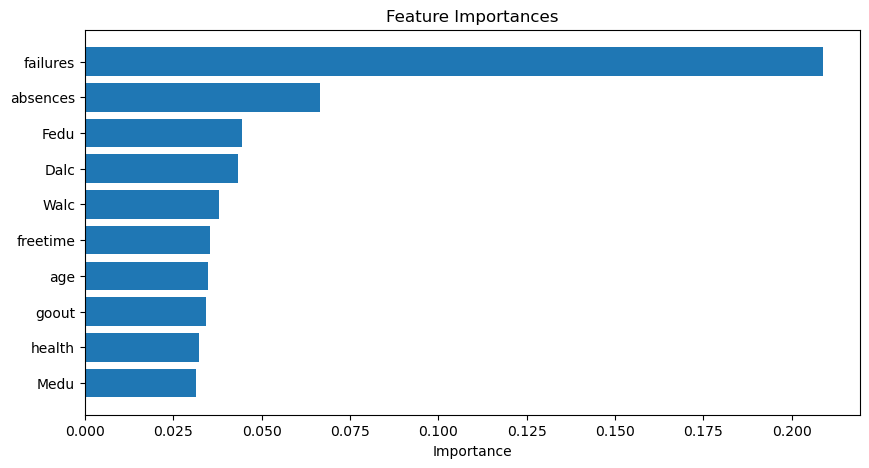

In [172]:
# Visualize the top 10 most important features
plt.figure(figsize=(10, 5))
plt.barh(importance_df['Feature'].head(10), importance_df['Importance'].head(10))  # Horizontal bar plot
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()


***MENTION THAT THE MODEL IS OVER FITTED***


In [173]:
filtered_rows = table[table['activities'] == 'yes']

# Example: Adding the filtered rows to another table
yesTable = pd.DataFrame()  # Create a new empty table
yesTable = pd.concat([yesTable, filtered_rows], ignore_index=True)

# Display the new table
print(yesTable)
yesTable = yesTable.reset_index()



    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   15       U     GT3       T     4     2    health  services   
1       GP   M   16       U     LE3       T     4     3  services     other   
2       GP   M   15       U     GT3       T     3     4     other     other   
3       GP   F   15       U     GT3       T     2     1  services     other   
4       GP   M   15       U     LE3       T     4     4    health  services   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
310     MS   M   18       R     GT3       T     2     1     other     other   
311     MS   M   17       U     GT3       T     2     3     other  services   
312     MS   F   18       R     GT3       T     4     4   teacher   at_home   
313     MS   F   19       R     GT3       T     2     3  services     other   
314     MS   F   18       U     GT3       T     1     1     other     other   

     ... famrel freetime  goout  Dalc  Walc health 

In [174]:
filtered_rows = table[table['activities'] == 'no']

# Example: Adding the filtered rows to another table
noTable = pd.DataFrame()  # Create a new empty table
noTable = pd.concat([noTable, filtered_rows], ignore_index=True)

# Display the new table
print(noTable)
noTable = noTable.reset_index()


    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   16       U     GT3       T     3     3     other     other   
4       GP   M   16       U     LE3       T     2     2     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
329     MS   F   18       R     GT3       T     2     2   at_home     other   
330     MS   F   17       U     GT3       T     4     3   teacher     other   
331     MS   F   18       U     LE3       T     3     1   teacher  services   
332     MS   M   17       U     LE3       T     3     1  services  services   
333     MS   M   18       R     LE3       T     3     2  services     other   

     ... famrel freetime  goout  Dalc  Walc health 

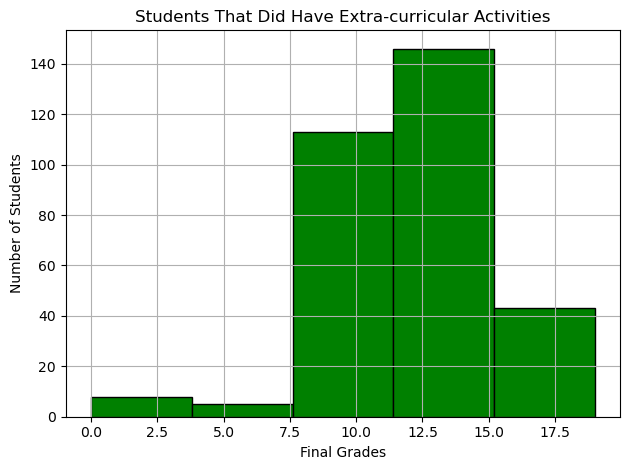

In [175]:
# Create a DataFrame
df = pd.DataFrame(yesTable)

df['G3'].hist(bins=5, color='green', edgecolor='black')

# Add titles and labels
plt.title('Students That Did Have Extra-curricular Activities')
plt.xlabel('Final Grades')
plt.ylabel('Number of Students')

# Show the plot
plt.tight_layout()
plt.show()


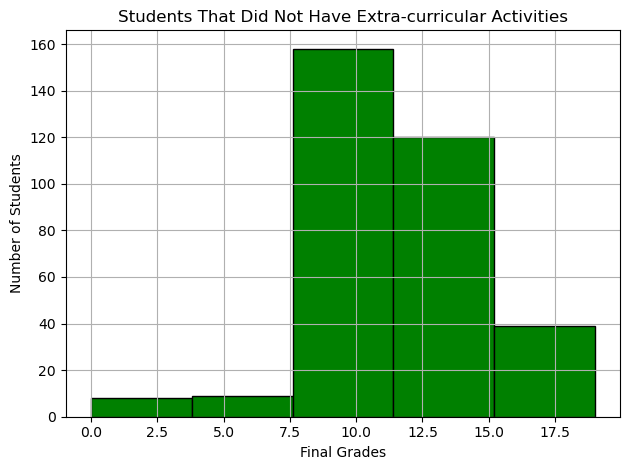

In [176]:
# Create a DataFrame
df = pd.DataFrame(noTable)

df['G3'].hist(bins=5, color='green', edgecolor='black')

# Add titles and labels
plt.title('Students That Did Not Have Extra-curricular Activities')
plt.xlabel('Final Grades')
plt.ylabel('Number of Students')

# Show the plot
plt.tight_layout()
plt.show()


In [177]:
filtered_rows = table[table['failures'] == 0]

# Example: Adding the filtered rows to another table
ZeroTable = pd.DataFrame()  # Create a new empty table
ZeroTable = pd.concat([ZeroTable, filtered_rows], ignore_index=True)

# Display the new table
print(ZeroTable)
ZeroTable = ZeroTable.reset_index()


    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
544     MS   F   18       R     GT3       T     4     4   teacher   at_home   
545     MS   F   18       U     LE3       T     3     1   teacher  services   
546     MS   F   18       U     GT3       T     1     1     other     other   
547     MS   M   17       U     LE3       T     3     1  services  services   
548     MS   M   18       R     LE3       T     3     2  services     other   

     ... famrel freetime  goout  Dalc  Walc health 

In [178]:
filtered_rows = table[table['failures'] == 1]

# Example: Adding the filtered rows to another table
OneTable = pd.DataFrame()  # Create a new empty table
OneTable = pd.concat([OneTable, filtered_rows], ignore_index=True)

# Display the new table
print(OneTable)
OneTable = OneTable.reset_index()


   school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0      GP   F   16       U     LE3       T     2     2     other   at_home   
1      GP   F   16       U     GT3       T     2     2   at_home     other   
2      GP   M   17       R     GT3       T     1     3     other     other   
3      GP   F   16       U     GT3       A     2     2     other     other   
4      GP   F   15       R     GT3       T     1     1     other     other   
..    ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
65     MS   F   17       R     GT3       T     1     1     other  services   
66     MS   F   19       R     GT3       T     1     1   at_home     other   
67     MS   M   19       R     GT3       T     1     1     other  services   
68     MS   M   18       R     GT3       T     4     2     other     other   
69     MS   F   19       R     GT3       T     2     3  services     other   

    ... famrel freetime  goout  Dalc  Walc health absences  G1 

In [179]:
filtered_rows = table[table['failures'] == 2]

# Example: Adding the filtered rows to another table
TwoTable = pd.DataFrame()  # Create a new empty table
TwoTable = pd.concat([TwoTable, filtered_rows], ignore_index=True)

# Display the new table
print(TwoTable)
TwoTable = TwoTable.reset_index()


   school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0      GP   F   19       U     GT3       T     0     1   at_home     other   
1      GP   M   16       U     LE3       T     1     1  services     other   
2      GP   M   18       U     LE3       T     1     1     other     other   
3      GP   M   16       U     LE3       T     1     2    health  services   
4      GP   M   17       R     GT3       T     3     2     other     other   
5      GP   M   18       U     GT3       T     2     1  services  services   
6      GP   M   20       U     GT3       A     3     2  services     other   
7      GP   F   19       U     LE3       A     1     1     other     other   
8      GP   F   21       U     LE3       T     4     4     other     other   
9      GP   M   21       R     LE3       T     1     1   at_home     other   
10     MS   F   18       R     LE3       A     3     2     other     other   
11     MS   M   19       U     GT3       T     1     1     other

In [180]:
filtered_rows = table[table['failures'] == 3]

# Example: Adding the filtered rows to another table
ThreeTable = pd.DataFrame()  # Create a new empty table
ThreeTable = pd.concat([ThreeTable, filtered_rows], ignore_index=True)

# Display the new table
print(ThreeTable)
ThreeTable = ThreeTable.reset_index()

   school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0      GP   M   17       U     GT3       T     3     2  services  services   
1      GP   M   17       U     GT3       T     2     1     other     other   
2      GP   F   18       U     GT3       T     2     1  services     other   
3      GP   M   17       R     LE3       T     1     2     other     other   
4      GP   F   18       R     GT3       T     1     1   at_home     other   
5      GP   M   17       U     GT3       T     3     2  services  services   
6      GP   M   18       U     GT3       T     2     2     other     other   
7      GP   M   22       U     GT3       T     3     1  services  services   
8      MS   F   16       R     GT3       T     1     1   at_home     other   
9      MS   M   17       R     GT3       T     4     4    health     other   
10     MS   F   17       R     GT3       T     3     1     other     other   
11     MS   M   19       U     GT3       T     3     2   at_home

In [181]:
filtered_rows = table[table['failures'] == 4]

# Example: Adding the filtered rows to another table
FourTable = pd.DataFrame()  # Create a new empty table
FourTable = pd.concat([FourTable, filtered_rows], ignore_index=True)

# Display the new table
print(FourTable)
FourTable = FourTable.reset_index()

Empty DataFrame
Columns: [school, sex, age, address, famsize, Pstatus, Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic, famrel, freetime, goout, Dalc, Walc, health, absences, G1, G2, G3]
Index: []

[0 rows x 33 columns]


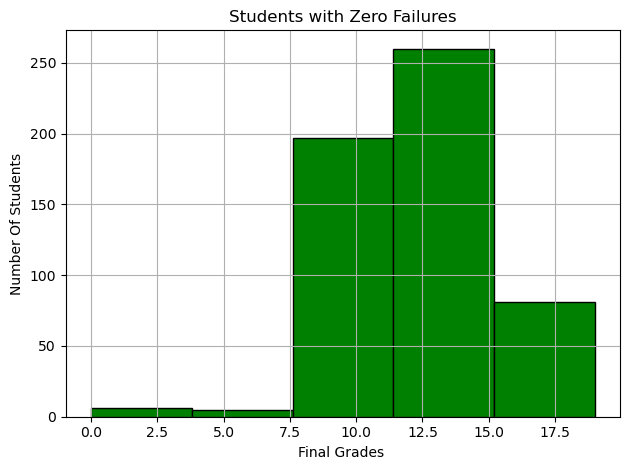

In [182]:
# Create a DataFrame
df = pd.DataFrame(ZeroTable)

df['G3'].hist(bins=5, color='green', edgecolor='black')

# Add titles and labels
plt.title('Students with Zero Failures')
plt.xlabel('Final Grades ')
plt.ylabel('Number Of Students')

# Show the plot
plt.tight_layout()
plt.show()

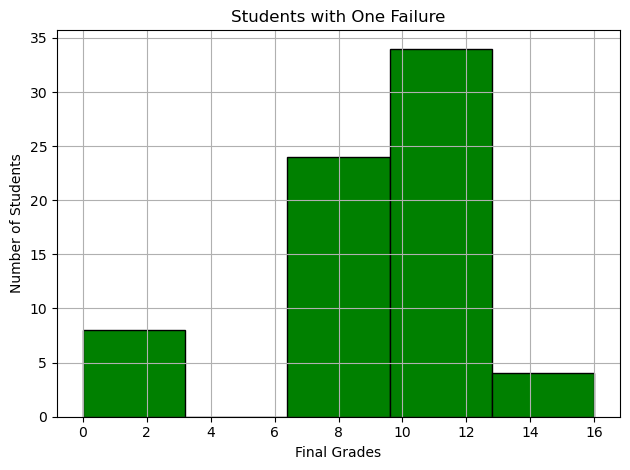

In [183]:
# Create a DataFrame
df = pd.DataFrame(OneTable)

df['G3'].hist(bins=5, color='green', edgecolor='black')

# Add titles and labels
plt.title('Students with One Failure')
plt.xlabel('Final Grades')
plt.ylabel('Number of Students')

# Show the plot
plt.tight_layout()
plt.show()

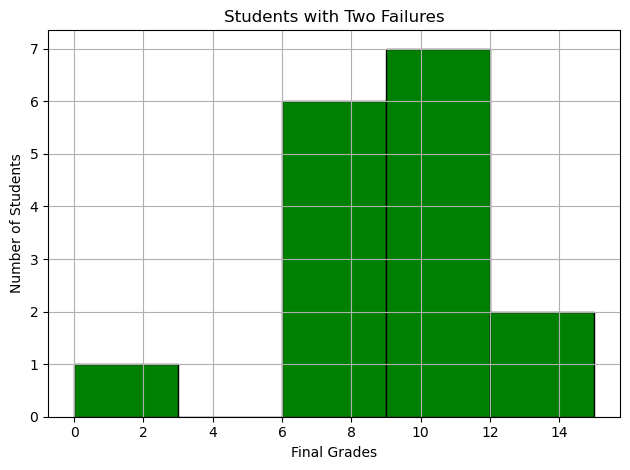

In [184]:
# Create a DataFrame
df = pd.DataFrame(TwoTable)

df['G3'].hist(bins=5, color='green', edgecolor='black')

# Add titles and labels
plt.title('Students with Two Failures')
plt.xlabel('Final Grades')
plt.ylabel('Number of Students')

# Show the plot
plt.tight_layout()
plt.show()

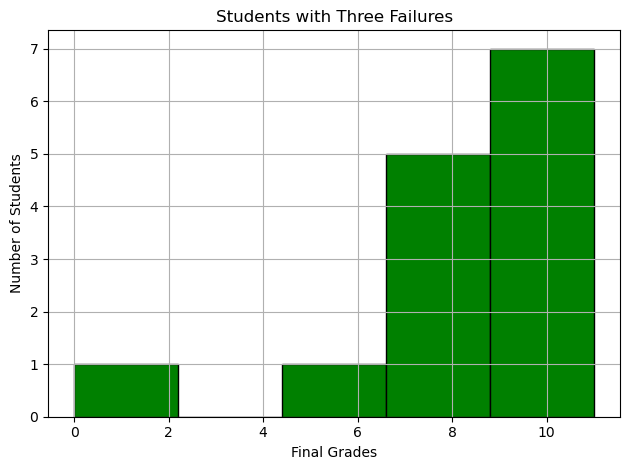

In [185]:
# Create a DataFrame
df = pd.DataFrame(ThreeTable)

df['G3'].hist(bins=5, color='green', edgecolor='black')

# Add titles and labels
plt.title('Students with Three Failures')
plt.xlabel('Final Grades')
plt.ylabel('Number of Students')

# Show the plot
plt.tight_layout()
plt.show()

In [186]:
filtered_rows = table[table['goout'] == 1]

# Example: Adding the filtered rows to another table
OneTable = pd.DataFrame()  # Create a new empty table
OneTable = pd.concat([OneTable, filtered_rows], ignore_index=True)

# Display the new table
print(OneTable)
OneTable = OneTable.reset_index()

   school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0      GP   M   15       U     GT3       T     3     4     other     other   
1      GP   M   15       U     GT3       T     4     3   teacher     other   
2      GP   M   16       U     LE3       T     4     2   teacher     other   
3      GP   M   15       U     GT3       T     4     4  services  services   
4      GP   F   15       U     GT3       T     2     3     other     other   
5      GP   F   15       R     GT3       T     2     2   at_home     other   
6      GP   M   15       U     GT3       T     2     2  services  services   
7      GP   M   17       U     GT3       T     2     1     other     other   
8      GP   F   16       U     GT3       A     3     4  services     other   
9      GP   M   16       U     GT3       T     2     1   at_home     other   
10     GP   F   15       R     GT3       T     3     3  services  services   
11     GP   F   17       U     GT3       T     4     4     other

In [187]:
filtered_rows = table[table['goout'] == 2]

# Example: Adding the filtered rows to another table
TwoTable = pd.DataFrame()  # Create a new empty table
TwoTable = pd.concat([TwoTable, filtered_rows], ignore_index=True)

# Display the new table
print(TwoTable)
TwoTable = TwoTable.reset_index()


    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   15       U     LE3       T     1     1   at_home     other   
1       GP   F   15       U     GT3       T     4     2    health  services   
2       GP   F   16       U     GT3       T     3     3     other     other   
3       GP   M   16       U     LE3       T     4     3  services     other   
4       GP   M   15       U     LE3       A     3     2  services     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
140     MS   M   18       U     LE3       T     4     4   teacher  services   
141     MS   F   18       R     GT3       T     4     4     other   teacher   
142     MS   F   18       R     GT3       T     1     1     other     other   
143     MS   M   19       R     GT3       T     1     1     other  services   
144     MS   F   19       R     GT3       T     2     3  services     other   

     ... famrel freetime  goout  Dalc  Walc health 

In [188]:
filtered_rows = table[table['goout'] == 3]

# Example: Adding the filtered rows to another table
ThreeTable = pd.DataFrame()  # Create a new empty table
ThreeTable = pd.concat([ThreeTable, filtered_rows], ignore_index=True)

# Display the new table
print(ThreeTable)
ThreeTable = ThreeTable.reset_index()



    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   17       U     GT3       T     1     1   at_home     other   
1       GP   F   15       U     GT3       T     4     4   teacher    health   
2       GP   M   15       U     LE3       T     4     4    health  services   
3       GP   M   15       U     GT3       T     4     3   teacher     other   
4       GP   F   16       U     GT3       T     4     4  services  services   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
200     MS   M   18       R     GT3       T     2     1     other     other   
201     MS   M   17       U     GT3       T     2     3     other  services   
202     MS   M   18       R     GT3       T     4     2     other     other   
203     MS   F   18       R     GT3       T     2     2   at_home     other   
204     MS   F   18       R     GT3       T     4     4   teacher   at_home   

     ... famrel freetime  goout  Dalc  Walc health 

In [189]:
filtered_rows = table[table['goout'] == 4]

# Example: Adding the filtered rows to another table
FourTable = pd.DataFrame()  # Create a new empty table
FourTable = pd.concat([FourTable, filtered_rows], ignore_index=True)

# Display the new table
print(FourTable)
FourTable = FourTable.reset_index()


    school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4  at_home   teacher   
1       GP   M   16       U     LE3       T     2     2    other     other   
2       GP   F   17       U     GT3       A     4     4    other   teacher   
3       GP   F   16       U     GT3       T     4     4   health     other   
4       GP   M   16       U     LE3       T     2     2    other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...      ...       ...   
136     MS   F   18       R     LE3       T     4     4    other     other   
137     MS   F   17       R     GT3       T     3     1  at_home     other   
138     MS   M   18       U     GT3       T     4     4  teacher   teacher   
139     MS   F   17       U     GT3       T     4     3  teacher     other   
140     MS   F   18       U     LE3       T     3     1  teacher  services   

     ... famrel freetime  goout  Dalc  Walc health absences  G1

In [190]:
filtered_rows = table[table['goout'] == 5]

# Example: Adding the filtered rows to another table
FiveTable = pd.DataFrame()  # Create a new empty table
FiveTable = pd.concat([FiveTable, filtered_rows], ignore_index=True)

# Display the new table
print(FiveTable)
FiveTable = FiveTable.reset_index()


    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   M   17       U     GT3       T     3     2  services  services   
1       GP   M   16       U     GT3       T     4     4   teacher   teacher   
2       GP   F   16       U     LE3       A     3     3     other  services   
3       GP   M   15       U     LE3       A     4     2    health    health   
4       GP   F   16       U     GT3       T     1     1  services  services   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
105     MS   F   18       U     LE3       T     2     2  services  services   
106     MS   F   19       U     GT3       T     1     1   at_home  services   
107     MS   M   17       R     GT3       T     4     3  services     other   
108     MS   F   17       R     GT3       T     1     2     other     other   
109     MS   M   17       U     LE3       T     3     1  services  services   

     ... famrel freetime  goout  Dalc  Walc health 

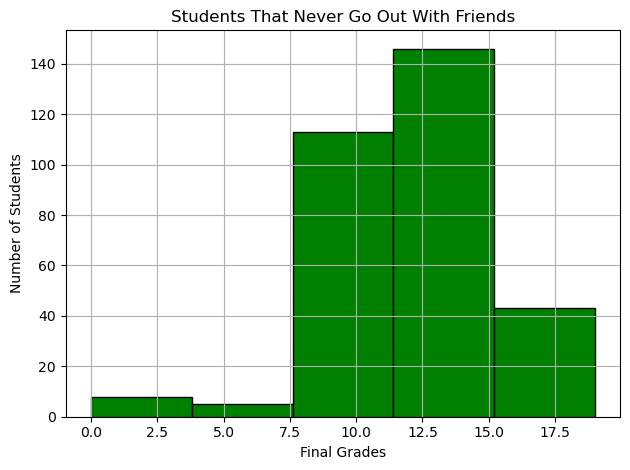

In [191]:
# Create a DataFrame
df = pd.DataFrame(yesTable)

df['G3'].hist(bins=5, color='green', edgecolor='black')

# Add titles and labels
plt.title('Students That Never Go Out With Friends')
plt.xlabel('Final Grades')
plt.ylabel('Number of Students')

# Show the plot
plt.tight_layout()
plt.show()

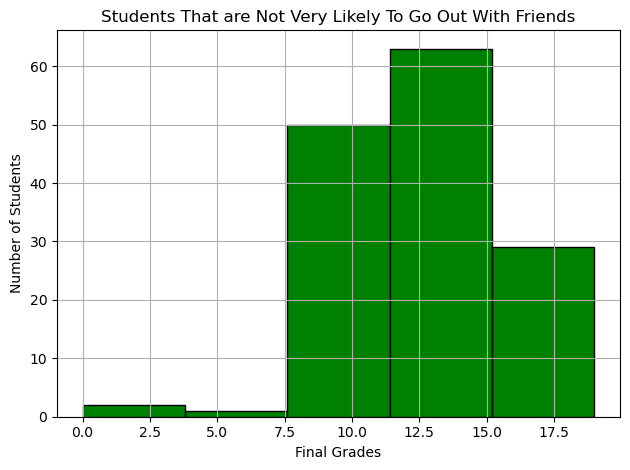

In [192]:
# Create a DataFrame
df = pd.DataFrame(TwoTable)

df['G3'].hist(bins=5, color='green', edgecolor='black')

# Add titles and labels
plt.title('Students That are Not Very Likely To Go Out With Friends')
plt.xlabel('Final Grades')
plt.ylabel('Number of Students')

# Show the plot
plt.tight_layout()
plt.show()

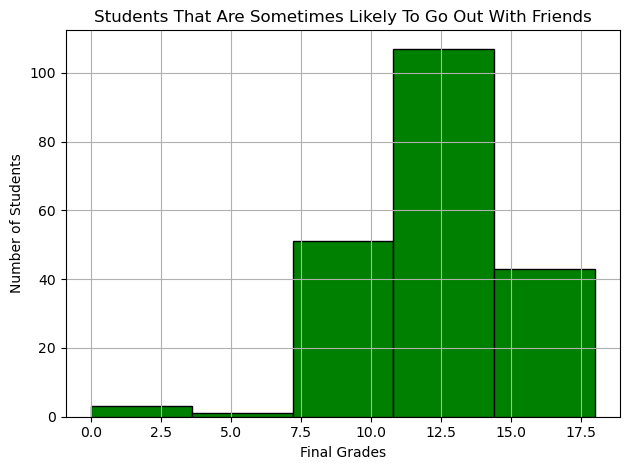

In [193]:
# Create a DataFrame
df = pd.DataFrame(ThreeTable)

df['G3'].hist(bins=5, color='green', edgecolor='black')

# Add titles and labels
plt.title('Students That Are Sometimes Likely To Go Out With Friends')
plt.xlabel('Final Grades')
plt.ylabel('Number of Students')

# Show the plot
plt.tight_layout()
plt.show()

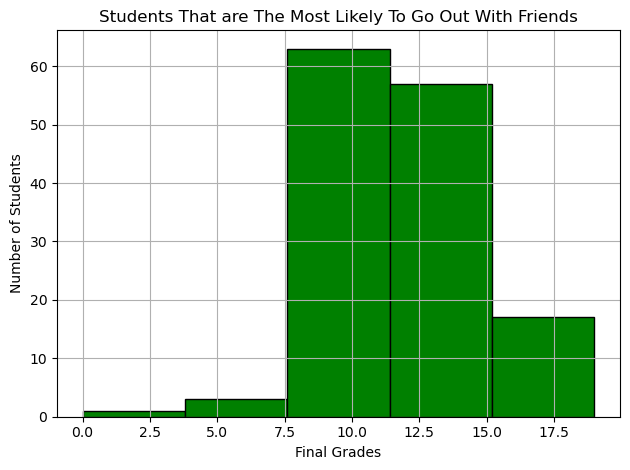

In [194]:
# Create a DataFrame
df = pd.DataFrame(FourTable)

df['G3'].hist(bins=5, color='green', edgecolor='black')

# Add titles and labels
plt.title('Students That are The Most Likely To Go Out With Friends')
plt.xlabel('Final Grades')
plt.ylabel('Number of Students')

# Show the plot
plt.tight_layout()
plt.show()

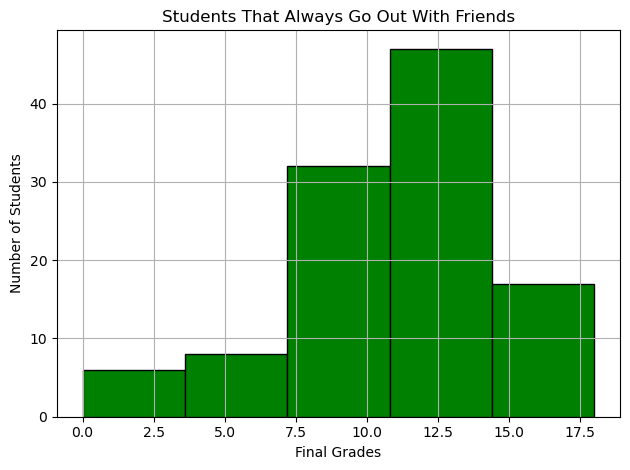

In [195]:
# Create a DataFrame
df = pd.DataFrame(FiveTable)

df['G3'].hist(bins=5, color='green', edgecolor='black')

# Add titles and labels
plt.title('Students That Always Go Out With Friends')
plt.xlabel('Final Grades')
plt.ylabel('Number of Students')

# Show the plot
plt.tight_layout()
plt.show()

In [196]:
filtered_rows = table[table['age'] == 15]

# Example: Adding the filtered rows to another table
FifteenTable = pd.DataFrame()  # Create a new empty table
FifteenTable = pd.concat([FifteenTable, filtered_rows], ignore_index=True)

# Display the new table
print(FifteenTable)
FifteenTable = FifteenTable.reset_index()


    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   15       U     LE3       T     1     1   at_home     other   
1       GP   F   15       U     GT3       T     4     2    health  services   
2       GP   M   15       U     LE3       A     3     2  services     other   
3       GP   M   15       U     GT3       T     3     4     other     other   
4       GP   F   15       U     GT3       T     4     4   teacher    health   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
107     MS   M   15       U     GT3       T     3     3  services  services   
108     MS   F   15       R     LE3       T     1     1   at_home     other   
109     MS   M   15       R     GT3       T     1     2     other  services   
110     MS   M   15       U     LE3       A     2     2     other     other   
111     MS   M   15       U     LE3       A     2     1  services  services   

     ... famrel freetime  goout  Dalc  Walc health 

In [197]:
filtered_rows = table[table['age'] == 16]

# Example: Adding the filtered rows to another table
SixteenTable = pd.DataFrame()  # Create a new empty table
SixteenTable = pd.concat([SixteenTable, filtered_rows], ignore_index=True)

# Display the new table
print(SixteenTable)
SixteenTable = SixteenTable.reset_index()

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   16       U     GT3       T     3     3     other     other   
1       GP   M   16       U     LE3       T     4     3  services     other   
2       GP   M   16       U     LE3       T     2     2     other     other   
3       GP   F   16       U     GT3       T     4     4    health     other   
4       GP   F   16       U     GT3       T     4     4  services  services   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
172     MS   F   16       R     LE3       T     2     2     other  services   
173     MS   M   16       R     GT3       T     3     2  services     other   
174     MS   M   16       R     LE3       T     1     1   at_home     other   
175     MS   M   16       R     GT3       T     2     2  services  services   
176     MS   F   16       U     GT3       A     3     2  services   at_home   

     ... famrel freetime  goout  Dalc  Walc health 

In [198]:
filtered_rows = table[table['age'] == 17]

# Example: Adding the filtered rows to another table
SeventeenTable = pd.DataFrame()  # Create a new empty table
SeventeenTable = pd.concat([SeventeenTable, filtered_rows], ignore_index=True)

# Display the new table
print(SeventeenTable)
SeventeenTable = SeventeenTable.reset_index()

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   17       U     GT3       T     1     1   at_home     other   
1       GP   F   17       U     GT3       A     4     4     other   teacher   
2       GP   M   17       U     GT3       T     3     2  services  services   
3       GP   M   17       U     GT3       T     2     1     other     other   
4       GP   M   17       R     GT3       T     1     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
174     MS   F   17       R     GT3       T     1     2     other     other   
175     MS   F   17       R     GT3       T     3     1   at_home     other   
176     MS   M   17       U     GT3       T     2     3     other  services   
177     MS   F   17       U     GT3       T     4     3   teacher     other   
178     MS   M   17       U     LE3       T     3     1  services  services   

     ... famrel freetime  goout  Dalc  Walc health 

In [199]:
filtered_rows = table[table['age'] == 18]

# Example: Adding the filtered rows to another table
EighteenTable = pd.DataFrame()  # Create a new empty table
EighteenTable = pd.concat([EighteenTable, filtered_rows], ignore_index=True)

# Display the new table
print(EighteenTable)
EighteenTable = EighteenTable.reset_index()

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   18       U     GT3       T     2     1  services     other   
2       GP   M   18       U     LE3       T     3     1  services  services   
3       GP   F   18       U     GT3       A     3     2     other  services   
4       GP   M   18       U     LE3       T     1     1     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
135     MS   F   18       R     GT3       T     2     2   at_home     other   
136     MS   F   18       R     GT3       T     4     4   teacher   at_home   
137     MS   F   18       U     LE3       T     3     1   teacher  services   
138     MS   F   18       U     GT3       T     1     1     other     other   
139     MS   M   18       R     LE3       T     3     2  services     other   

     ... famrel freetime  goout  Dalc  Walc health 

In [200]:
filtered_rows = table[table['age'] == 19]

# Example: Adding the filtered rows to another table
NineteenTable = pd.DataFrame()  # Create a new empty table
NineteenTable = pd.concat([NineteenTable, filtered_rows], ignore_index=True)

# Display the new table
print(NineteenTable)
NineteenTable = NineteenTable.reset_index()

   school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0      GP   F   19       U     GT3       T     0     1   at_home     other   
1      GP   M   19       U     GT3       T     3     2  services   at_home   
2      GP   F   19       U     GT3       T     3     3     other     other   
3      GP   F   19       U     GT3       T     2     2  services  services   
4      GP   M   19       U     LE3       A     4     3  services   at_home   
5      GP   F   19       U     GT3       T     3     3     other  services   
6      GP   F   19       R     GT3       T     3     2  services  services   
7      GP   F   19       U     GT3       T     4     4    health     other   
8      GP   M   19       R     LE3       T     2     1   at_home  services   
9      GP   M   19       R     GT3       T     3     3     other  services   
10     GP   M   19       U     GT3       T     4     2    health     other   
11     GP   F   19       U     GT3       T     1     1     other

In [201]:
filtered_rows = table[table['age'] == 20]

# Example: Adding the filtered rows to another table
TwentyTable = pd.DataFrame()  # Create a new empty table
TwentyTable = pd.concat([TwentyTable, filtered_rows], ignore_index=True)

# Display the new table
print(TwentyTable)
TwentyTable = TwentyTable.reset_index()

  school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0     GP   F   20       R     GT3       T     2     1     other     other   
1     GP   M   20       U     GT3       A     3     2  services     other   
2     GP   F   20       R     GT3       T     1     1     other     other   
3     GP   F   20       U     GT3       T     1     0     other     other   
4     MS   F   20       U     GT3       T     3     3   at_home  services   
5     MS   M   20       R     GT3       T     1     1     other     other   

   ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0  ...      1        2      3     1     2      2        8  10  12  12  
1  ...      5        5      3     1     1      5        0  14  15  15  
2  ...      3        2      2     1     3      3        8  11  15  15  
3  ...      5        3      1     1     1      5        5   8  10  10  
4  ...      3        3      4     2     4      3        8  11   9  10  
5  ...      4        4      

In [202]:
filtered_rows = table[table['age'] == 21]

# Example: Adding the filtered rows to another table
TwentyoneTable = pd.DataFrame()  # Create a new empty table
TwentyoneTable = pd.concat([TwentyoneTable, filtered_rows], ignore_index=True)

# Display the new table
print(TwentyoneTable)
TwentyoneTable = TwentyoneTable.reset_index()

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob   Fjob  ...  \
0     GP   F   21       U     LE3       T     4     4    other  other  ...   
1     GP   M   21       R     LE3       T     1     1  at_home  other  ...   

  famrel freetime  goout  Dalc  Walc health absences G1  G2  G3  
0      3        3      2     1     1      5        0  9  12  12  
1      5        3      3     5     2      4       21  9  10  10  

[2 rows x 33 columns]


In [203]:
filtered_rows = table[table['age'] == 22]

# Example: Adding the filtered rows to another table
TwentytwoTable = pd.DataFrame()  # Create a new empty table
TwentytwoTable = pd.concat([TwentytwoTable, filtered_rows], ignore_index=True)

# Display the new table
print(TwentytwoTable)
TwentytwoTable = TwentytwoTable.reset_index()

  school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0     GP   M   22       U     GT3       T     3     1  services  services   

   ... famrel freetime  goout  Dalc  Walc health absences G1 G2 G3  
0  ...      5        4      5     5     5      1       12  7  8  5  

[1 rows x 33 columns]


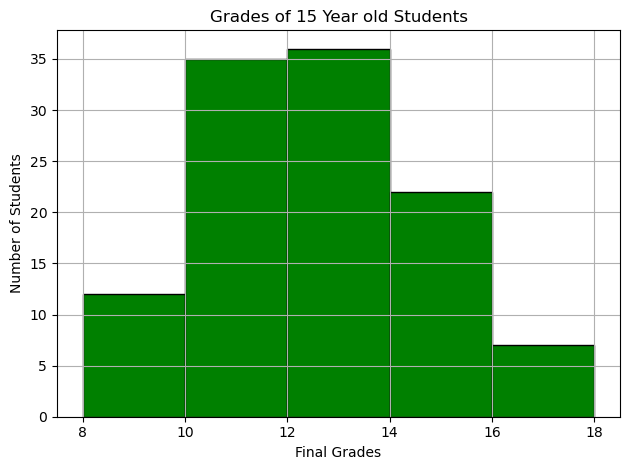

In [204]:
# Create a DataFrame
df = pd.DataFrame(FifteenTable)

df['G3'].hist(bins=5, color='green', edgecolor='black')

# Add titles and labels
plt.title('Grades of 15 Year old Students')
plt.xlabel('Final Grades')
plt.ylabel('Number of Students')

# Show the plot
plt.tight_layout()


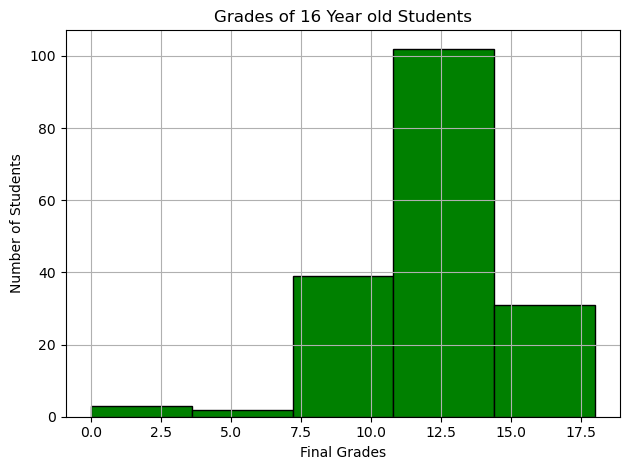

In [205]:
plt.show()
# Create a DataFrame
df = pd.DataFrame(SixteenTable)

df['G3'].hist(bins=5, color='green', edgecolor='black')

# Add titles and labels
plt.title('Grades of 16 Year old Students')
plt.xlabel('Final Grades')
plt.ylabel('Number of Students')

# Show the plot
plt.tight_layout()


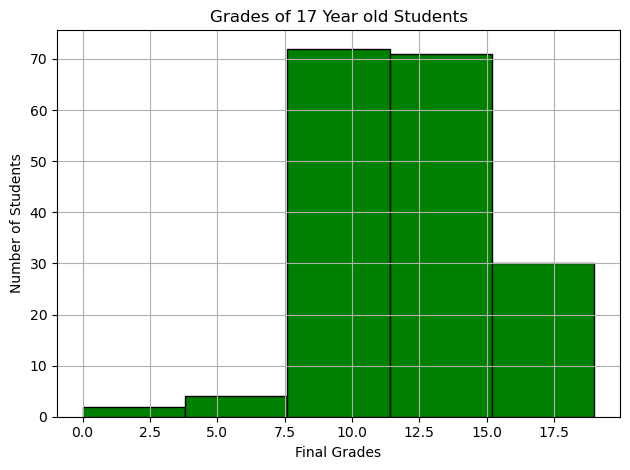

In [206]:
plt.show()# Create a DataFrame
df = pd.DataFrame(SeventeenTable)

df['G3'].hist(bins=5, color='green', edgecolor='black')

# Add titles and labels
plt.title('Grades of 17 Year old Students')
plt.xlabel('Final Grades')
plt.ylabel('Number of Students')

# Show the plot
plt.tight_layout()


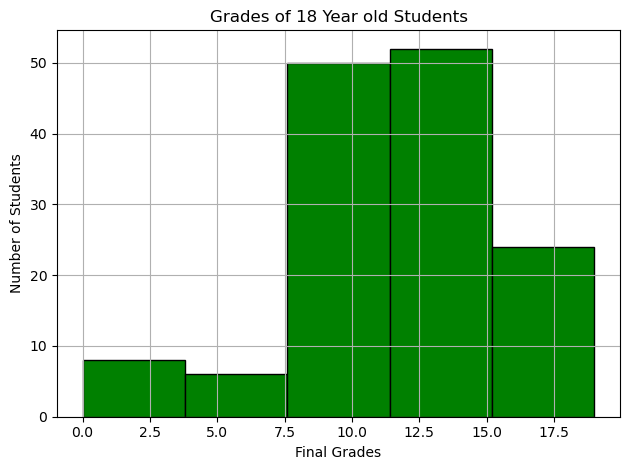

In [207]:
plt.show()# Create a DataFrame
df = pd.DataFrame(EighteenTable)

df['G3'].hist(bins=5, color='green', edgecolor='black')

# Add titles and labels
plt.title('Grades of 18 Year old Students')
plt.xlabel('Final Grades')
plt.ylabel('Number of Students')

# Show the plot
plt.tight_layout()


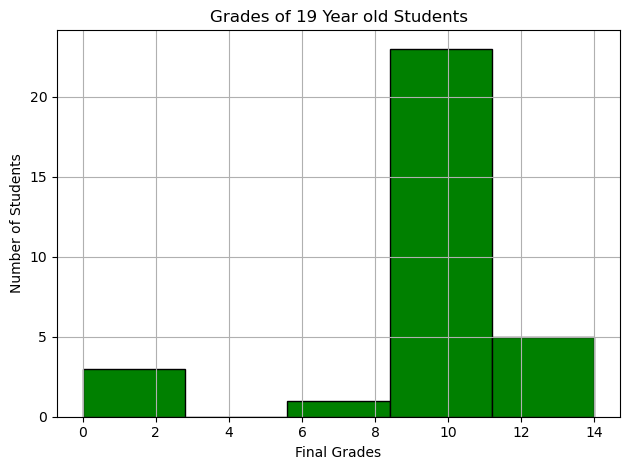

In [208]:
plt.show()# Create a DataFrame
df = pd.DataFrame(NineteenTable)

df['G3'].hist(bins=5, color='green', edgecolor='black')

# Add titles and labels
plt.title('Grades of 19 Year old Students')
plt.xlabel('Final Grades')
plt.ylabel('Number of Students')

# Show the plot
plt.tight_layout()


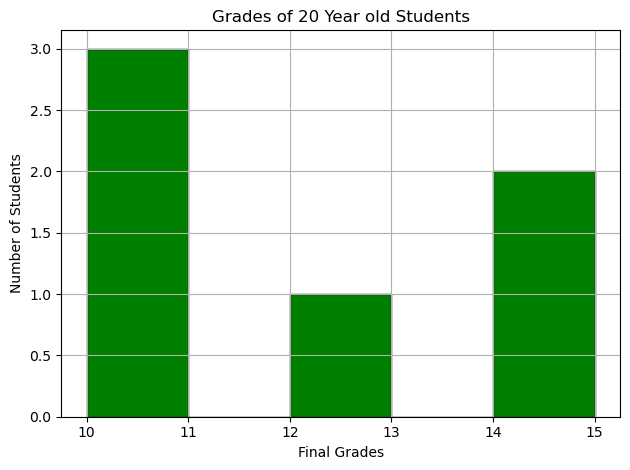

In [209]:
plt.show()# Create a DataFrame
df = pd.DataFrame(TwentyTable)

df['G3'].hist(bins=5, color='green', edgecolor='black')

# Add titles and labels
plt.title('Grades of 20 Year old Students')
plt.xlabel('Final Grades')
plt.ylabel('Number of Students')

# Show the plot
plt.tight_layout()


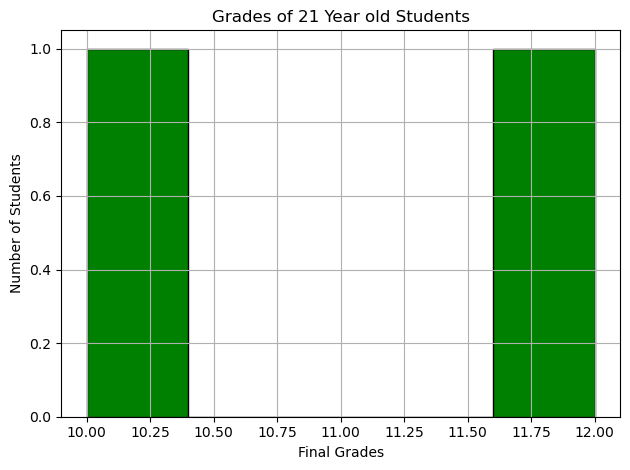

In [210]:
plt.show()# Create a DataFrame
df = pd.DataFrame(TwentyoneTable)

df['G3'].hist(bins=5, color='green', edgecolor='black')

# Add titles and labels
plt.title('Grades of 21 Year old Students')
plt.xlabel('Final Grades')
plt.ylabel('Number of Students')

# Show the plot
plt.tight_layout()


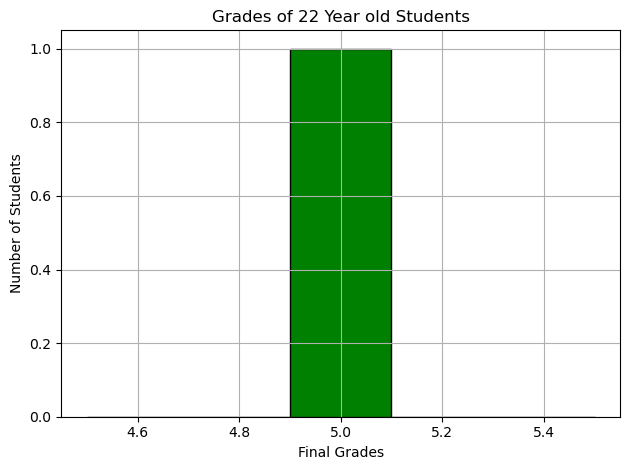

In [211]:
plt.show()# Create a DataFrame
df = pd.DataFrame(TwentytwoTable)

df['G3'].hist(bins=5, color='green', edgecolor='black')

# Add titles and labels
plt.title('Grades of 22 Year old Students')
plt.xlabel('Final Grades')
plt.ylabel('Number of Students')

# Show the plot
plt.tight_layout()


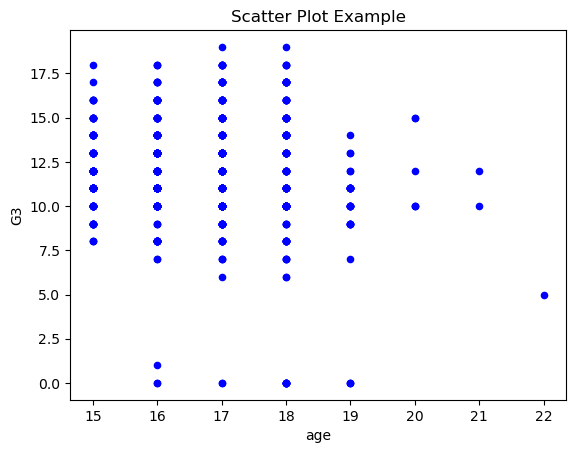

In [212]:
df = pd.DataFrame(table)

# Scatter plot
df.plot(kind='scatter', x='age', y='G3', color='blue', title='Scatter Plot Example')

# Show the plot
plt.show()

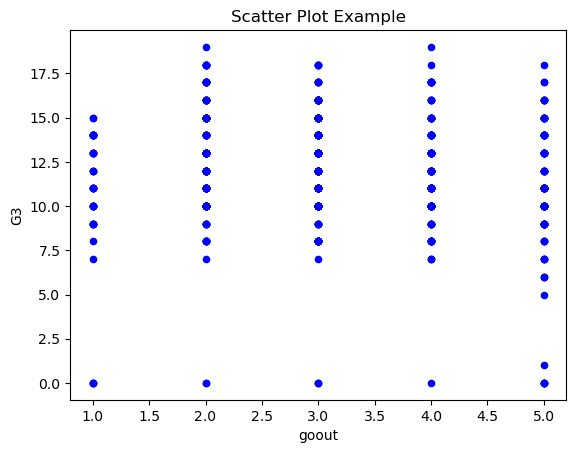

In [213]:
df = pd.DataFrame(table)

# Scatter plot
df.plot(kind='scatter', x='goout', y='G3', color='blue', title='Scatter Plot Example')

# Show the plot
plt.show()

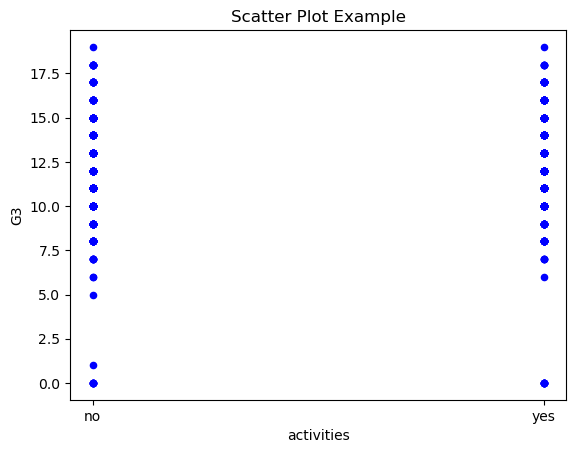

In [214]:
df = pd.DataFrame(table)

# Scatter plot
df.plot(kind='scatter', x='activities', y='G3', color='blue', title='Scatter Plot Example')

# Show the plot
plt.show()

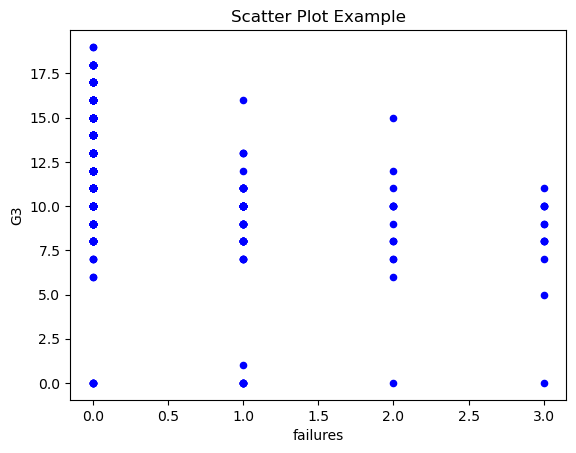

In [215]:
df = pd.DataFrame(table)

# Scatter plot
df.plot(kind='scatter', x='failures', y='G3', color='blue', title='Scatter Plot Example')

# Show the plot
plt.show()